# Tidy data set

**Por: Prof. Dr. Tetsu Sakamoto (IMD/UFRN)**


---
## Introdução

Na aula passada foi visto algumas sobre a estrutura de dados que a biblioteca pandas fornece: o DataFrame e Series. Vimos também algumas funções que o pandas oferece para manipular/modificar os seus dados. Estas funções são importantes pois muitos dados que você for trabalhar não possuem a formatação correta para serem utilizados nos métodos de análises de dados. Dados que seguem a formatação correta são denominados *tidy dataset*.

Neste roteiro, será mostrado a definição do *tidy dataset* e como manipular os dados para que ele fique no neste formato.

## Tidy dataset

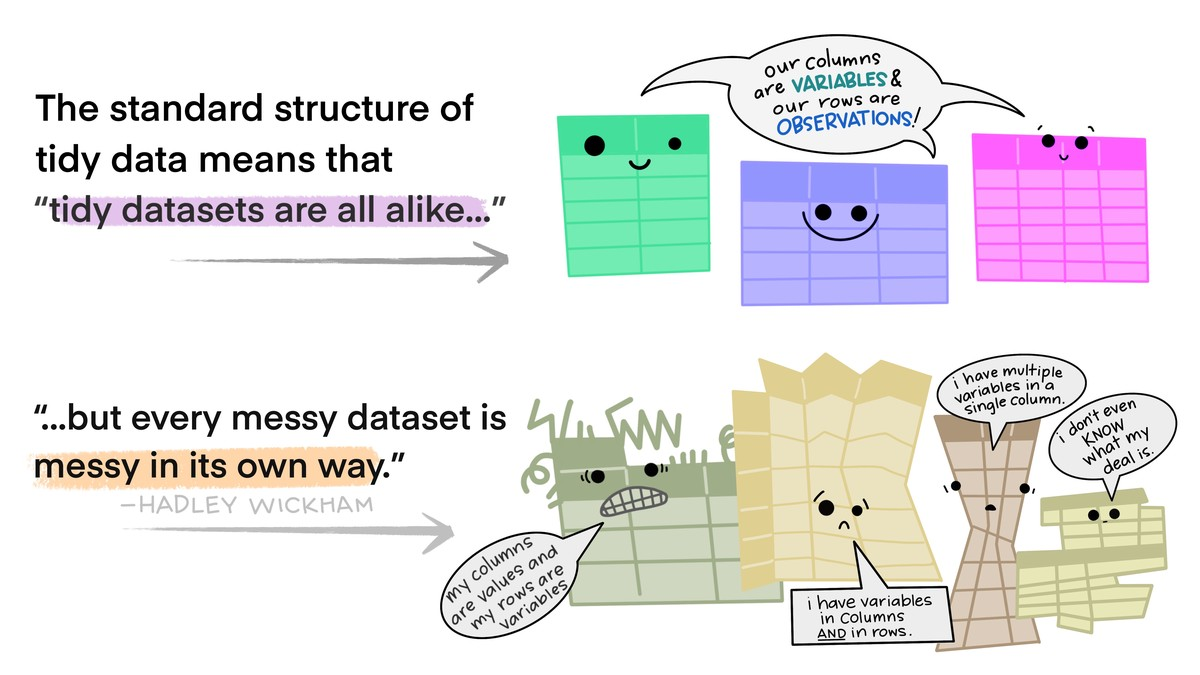

fonte: https://cfss.uchicago.edu/notes/tidy-data/

Definimos o *tidy dataset* como uma tabela de dados que segue as seguintes regras:
* Cada coluna representa uma variável;
* Cada linha representa uma observação;
* Cada valor deve ter a sua própria célula.


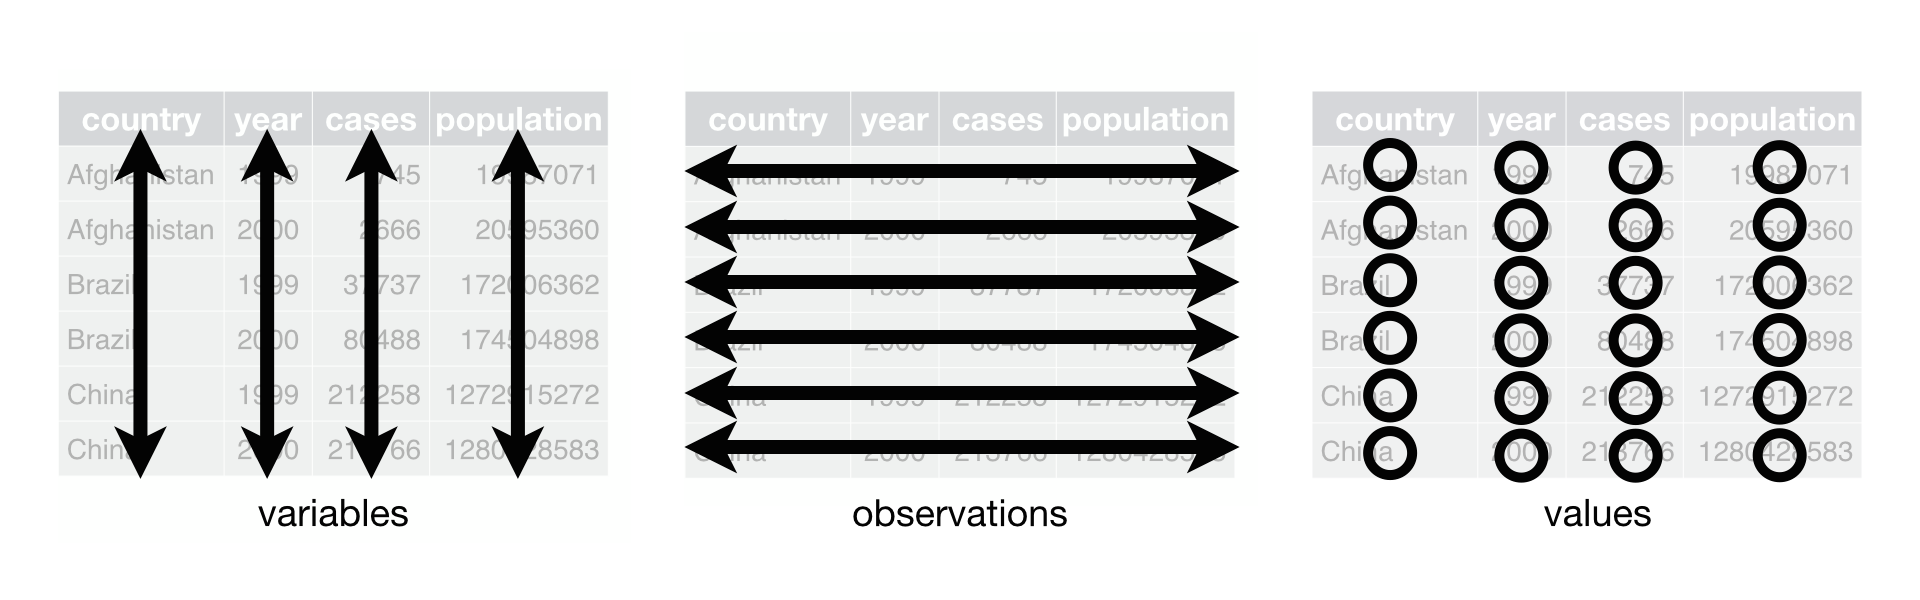

fonte: https://cfss.uchicago.edu/notes/tidy-data/

Em Python, a biblioteca largamente utilizada para manipular os dados para que ele se torne *tidy* é o pandas. Nas células a seguir vocês encontrarão alguns exemplos de *messy data* e de como tornar esses dados *tidy* utilizando o *pandas*.

Você pode encontrar um conjunto de funções do pandas para ajudar nesta tarefa no seguinte link: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

A tabela abaixo mostra o número de casos de uma determinada doença em diversos países e em diferentes anos.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'country': {0:"Afghanistan", 1:"Brazil", 2:"China"}, '1999':{0:745,1:37737,2:212258}, '2000': {0:2666,1:80488,2:213766}}
df = pd.DataFrame(data)
df

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


Se considerarmos que as nossas observações sejam a contagem por ano/país, não podemos considerar que esta tabela esteja *tidy*, já que a variável anos se encontra em múltiplas colunas (1999 e 2000).

Para tornar esta tabela *tidy*, teremos que criar uma nova coluna chamado *year* e preencher-la com os nomes das colunas 1999 e 2000. Para isso utilizaremos a função *melt* do pandas (https://pandas.pydata.org/docs/reference/api/pandas.melt.html).

Tente gerar uma tabela como mostra abaixo utilizando esta função.

In [3]:
pd.melt(df, id_vars=['country'], value_vars=["1999","2000"], var_name="year", value_name="cases")

,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


---
Considere agora a tabela a seguir:

In [4]:
data = {"country": ["Afghanistan","Afghanistan","Afghanistan","Afghanistan","Brazil","Brazil","Brazil","Brazil","China","China","China","China"],
"year": ["1999","1999","2000","2000","1999","1999","2000","2000","1999","1999","2000","2000"],
"type": ["cases","population","cases","population","cases","population","cases","population","cases","population","cases","population"],
"count":["745","19987071","2666","20595360","37737","172006362","80488","174504898","212258","1272915272","213766","1280428583"]}

df = pd.DataFrame(data)
df

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


Se considerarmos novamente que as nossas observações sejam a contagem por ano/país, não podemos considerar que esta tabela esteja tidy, já que cada observação se encontra em múltiplas linhas (por exemplo, a observação Brazil/1999 aparece duas vezes). Para tornar esta tabela *tidy*, teremos que transformar os valores da coluna *type* (*cases* e *population*) em variáveis. Para isso utilizaremos a função *pivot()* do pandas (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

Tente gerar a tabela abaixo utilizando esta função.

In [5]:
df.pivot(columns="type", values="count", index=["country","year"])

type               cases  population
country     year                    
Afghanistan 1999     745    19987071
            2000    2666    20595360
Brazil      1999   37737   172006362
            2000   80488   174504898
China       1999  212258  1272915272
            2000  213766  1280428583

---
Existem várias outras formas e funções que podem te auxiliar na manipulação desses dados. Vamos verificar algumas delas utilizando o conjunto de dados abaixo:

### Dados de expressão gênica de linfomas

Os dados que serão utilizados nesta aula são dados de expressão gênica de linfomas proveniente do artigo de [Shipp et al. (2002)](https://www.nature.com/articles/nm0102-68). Neste trabalho, foi verificado se é possível identificar dois tipos de linfoma (Linfoma difuso de células B grandes - DLBCL; e linfoma folicular - FL) utilizando dados de expressão gênica e métodos de aprendizado de máquina. Para isso, foram obtidos dados de expressão de 6.817 genes de 58 pacientes com DLBCL e 19 com FL.

Nas células abaixo, carregaremos os dados de expressão gênica e das anotações de cada paciente.

In [6]:
# Carregar os dados de expressão (Shipp et al., 2002)
linkData = "http://pubs.broadinstitute.org/mpr/projects/Lymphoma/lymphoma_8_lbc_fscc2_rn.res"
file = pd.read_csv(linkData,       # Endereço onde os dados estão hospedados;
                   sep="\t",       # Indicar que as colunas estão separadas por tabulação;
                   skiprows=[1,2]) # Pular as linhas 1 e 2 (primeira linha = 0);

file # visualizar os dados

,Description,Accession,DLBC1,Unnamed: 3,DLBC2,Unnamed: 5,DLBC3,Unnamed: 7,DLBC4,Unnamed: 9,...,Unnamed: 147,FSCC19,Unnamed: 149,FSCC2,Unnamed: 151,FSCC9,Unnamed: 153,FSCC1,Unnamed: 155,Unnamed: 156
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-104,A,-152,A,-158,A,-124,A,...,A,-558,A,-288,A,-407,A,-121,A,NaN
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-187,A,-328,A,-129,A,-121,A,...,A,-167,A,-237,A,-275,A,-107,A,NaN
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-26,A,-52,A,11,A,-3,A,...,A,-23,A,-99,A,-147,A,-87,A,NaN
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,59,A,267,A,88,A,-37,A,...,A,177,A,200,A,190,A,135,A,NaN
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-238,A,-300,A,-239,A,-210,A,...,A,-41,A,-50,A,-158,A,-311,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,897,A,737,A,946,A,339,A,...,A,1571,A,322,A,875,A,1629,A,NaN
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,366,A,81,A,450,A,321,A,...,A,861,A,-109,A,157,A,714,A,NaN
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,3,A,-4,A,38,A,-63,A,...,A,-53,A,-221,A,-97,A,-1,A,NaN
7127,"Glycophorin Sta type A (HGpSta(A)) gene, exons...",M71243_f_at,76,A,41,A,164,A,73,A,...,A,17,A,-213,A,-120,A,370,A,NaN


Nestes dados, o dado de expressão de cada paciente (observação) se encontra nas colunas (DLBC1, DBBC2, ...) e a expressão de cada gene (variáveis) se encontram nas linhas (AFFX-BioB-5_at, AFFX-BioB-M_at, ...). Temos ainda algumas colunas indesejáveis (Unnamed: 3, Unnamed: 5, ...). Por isso, antes de submeter esses dados para gerar um modelo de classificação, precisaremos torná-lo *tidy*. Nas próximas células mostrarei passo a passo de como fazer isso.

Antes disso, vamos carregar também os rótulos de cada paciente:

In [7]:
# Dados de classificação das amostras (variável resposta)
linkLabel = "http://pubs.broadinstitute.org/mpr/projects/Lymphoma/lymphoma_8_lbc_fscc2.cls"
cls = pd.read_csv(linkLabel,
                  sep=" ",
                  skiprows=[0,1],
                  header=None)
cls = cls.transpose()[0]
cls

0     1
1     1
2     1
3     1
4     1
     ..
72    0
73    0
74    0
75    0
76    0
Name: 0, Length: 77, dtype: int64

Neste caso, os pacientes com o rótulo 1 são aqueles com DLBCL e os pacientes com o rótulo 0, FL.

### Estruturando os dados

As células abaixo farão alguns procedimentos que estruturarão os dados para torná-los aplicáveis nas funções que geram os modelos de aprendizagem de máquina.

In [8]:
## Retirada das colunas Unnamed: X
file = file.filter(regex='^[^U]') # filtrar todas colunas que nao comeca com U
file

,Description,Accession,DLBC1,DLBC2,DLBC3,DLBC4,DLBC5,DLBC6,DLBC7,DLBC8,...,FSCC12,FSCC4,FSCC13,FSCC7,FSCC18,FSCC6,FSCC19,FSCC2,FSCC9,FSCC1
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-104,-152,-158,-124,-93,-34,-251,-204,...,-83,-151,-71,-91,-77,-149,-558,-288,-407,-121
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-187,-328,-129,-121,-258,-257,-264,-293,...,-106,-77,-106,-62,-191,-210,-167,-237,-275,-107
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-26,-52,11,-3,-36,-104,-99,-32,...,131,-80,-75,6,-15,-24,-23,-99,-147,-87
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,59,267,88,-37,109,71,31,148,...,249,94,109,139,168,164,177,200,190,135
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-238,-300,-239,-210,-109,-196,-244,-327,...,-230,-140,-109,-90,-121,-38,-41,-50,-158,-311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,897,737,946,339,721,617,29,265,...,984,252,875,399,854,412,1571,322,875,1629
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,366,81,450,321,213,409,-291,64,...,380,228,188,263,265,-29,861,-109,157,714
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,3,-4,38,-63,15,43,-355,-16,...,18,34,36,1,10,-264,-53,-221,-97,-1
7127,"Glycophorin Sta type A (HGpSta(A)) gene, exons...",M71243_f_at,76,41,164,73,155,68,-226,170,...,276,78,79,74,73,-292,17,-213,-120,370


In [9]:
## Extraindo os dados numéricos
data = file.loc[:,"DLBC1":] # Seleciona as colunas entre DLBC1 e FSCC1
data



,DLBC1,DLBC2,DLBC3,DLBC4,DLBC5,DLBC6,DLBC7,DLBC8,DLBC9,DLBC10,...,FSCC12,FSCC4,FSCC13,FSCC7,FSCC18,FSCC6,FSCC19,FSCC2,FSCC9,FSCC1
0,-104,-152,-158,-124,-93,-34,-251,-204,-144,-94,...,-83,-151,-71,-91,-77,-149,-558,-288,-407,-121
1,-187,-328,-129,-121,-258,-257,-264,-293,-356,-204,...,-106,-77,-106,-62,-191,-210,-167,-237,-275,-107
2,-26,-52,11,-3,-36,-104,-99,-32,-194,-28,...,131,-80,-75,6,-15,-24,-23,-99,-147,-87
3,59,267,88,-37,109,71,31,148,84,53,...,249,94,109,139,168,164,177,200,190,135
4,-238,-300,-239,-210,-109,-196,-244,-327,-269,-166,...,-230,-140,-109,-90,-121,-38,-41,-50,-158,-311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,897,737,946,339,721,617,29,265,301,921,...,984,252,875,399,854,412,1571,322,875,1629
7125,366,81,450,321,213,409,-291,64,102,155,...,380,228,188,263,265,-29,861,-109,157,714
7126,3,-4,38,-63,15,43,-355,-16,-163,-40,...,18,34,36,1,10,-264,-53,-221,-97,-1
7127,76,41,164,73,155,68,-226,170,104,107,...,276,78,79,74,73,-292,17,-213,-120,370


In [10]:
# Transpor os dados para que os atributos fiquem nas colunas e as amostras nas linhas.
data = data.transpose()            # Transpõe a tabela
data

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
DLBC1,-104,-187,-26,59,-238,-258,-400,-146,-34,-100,...,132,1036,-161,1523,-72,897,366,3,76,-28
DLBC2,-152,-328,-52,267,-300,-314,578,-185,111,148,...,147,4254,-75,6056,-68,737,81,-4,41,-45
DLBC3,-158,-129,11,88,-239,-429,-891,-258,22,-271,...,169,1934,-129,2901,-9,946,450,38,164,-62
DLBC4,-124,-121,-3,-37,-210,-309,-489,-69,-35,172,...,13,2469,93,2465,-119,339,321,-63,73,-13
DLBC5,-93,-258,-36,109,-109,-272,-469,-279,-90,-31,...,69,608,-39,1667,-87,721,213,15,155,-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FSCC6,-149,-210,-24,164,-38,-191,83,-63,-158,211,...,418,1014,-531,1039,-325,412,-29,-264,-292,-384
FSCC19,-558,-167,-23,177,-41,-400,-728,-175,175,-289,...,408,1629,-378,311,-251,1571,861,-53,17,-396
FSCC2,-288,-237,-99,200,-50,-186,-9,-158,-35,87,...,288,573,-26,1170,-262,322,-109,-221,-213,-318
FSCC9,-407,-275,-147,190,-158,-248,-201,-91,16,781,...,239,501,-329,335,-214,875,157,-97,-120,-291


Agora, cada linha da tabela corresponde a um paciente e cada coluna corresponde a um gene. Estes dados estão prontos para serem submetidos a um modelo de classificação. Mas antes, vamos apenas adicionar os índices nos dados dos rótulos.

In [11]:
# adicionando índices a variável resposta
cls.index = data.index
cls

DLBC1     1
DLBC2     1
DLBC3     1
DLBC4     1
DLBC5     1
         ..
FSCC6     0
FSCC19    0
FSCC2     0
FSCC9     0
FSCC1     0
Name: 0, Length: 77, dtype: int64

Pronto! Agora os seus dados estão tidy!

### Exercício

Suponha que você queira obter um gráfico como este:

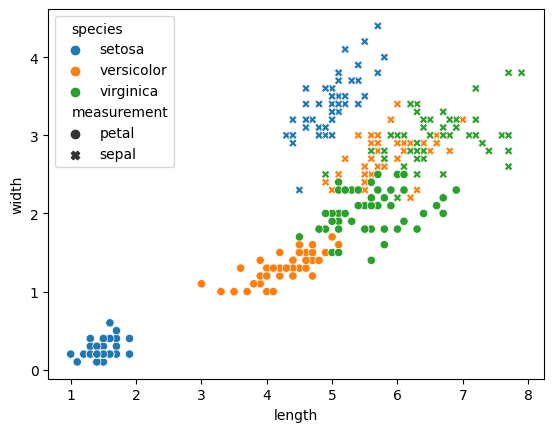

A partir do gráfico, responda:
* Quais são as observações?
* Quais são as variáveis?

Tente utilizar as funções melt, pivot e mais alguns outros (split) nos dados abaixo para tornar o dataset tidy.

In [12]:
import seaborn as sns

df = sns.load_dataset('iris')
df["sample"] = df.index
df

,sepal_length,sepal_width,petal_length,petal_width,species,sample
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,3
4,5.0,3.6,1.4,0.2,setosa,4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,145
146,6.3,2.5,5.0,1.9,virginica,146
147,6.5,3.0,5.2,2.0,virginica,147
148,6.2,3.4,5.4,2.3,virginica,148


In [13]:
tidy = pd.melt(df,["species","sample"],var_name="measurement_type")
tidy

,species,sample,measurement_type,value
0,setosa,0,sepal_length,5.1
1,setosa,1,sepal_length,4.9
2,setosa,2,sepal_length,4.7
3,setosa,3,sepal_length,4.6
4,setosa,4,sepal_length,5.0
...,...,...,...,...
595,virginica,145,petal_width,2.3
596,virginica,146,petal_width,1.9
597,virginica,147,petal_width,2.0
598,virginica,148,petal_width,2.3


In [14]:
tidy[['measurement','type']] = tidy['measurement_type'].str.split('_',expand=True)
tidy

,species,sample,measurement_type,value,measurement,type
0,setosa,0,sepal_length,5.1,sepal,length
1,setosa,1,sepal_length,4.9,sepal,length
2,setosa,2,sepal_length,4.7,sepal,length
3,setosa,3,sepal_length,4.6,sepal,length
4,setosa,4,sepal_length,5.0,sepal,length
...,...,...,...,...,...,...
595,virginica,145,petal_width,2.3,petal,width
596,virginica,146,petal_width,1.9,petal,width
597,virginica,147,petal_width,2.0,petal,width
598,virginica,148,petal_width,2.3,petal,width


In [15]:
tidy = tidy.drop(columns=["measurement_type"])

In [16]:
tidy2 = tidy.pivot(columns='type',values='value', index=['sample','measurement','species'])
tidy2

type                          length  width
sample measurement species                 
0      petal       setosa        1.4    0.2
       sepal       setosa        5.1    3.5
1      petal       setosa        1.4    0.2
       sepal       setosa        4.9    3.0
2      petal       setosa        1.3    0.2
...                              ...    ...
147    sepal       virginica     6.5    3.0
148    petal       virginica     5.4    2.3
       sepal       virginica     6.2    3.4
149    petal       virginica     5.1    1.8
       sepal       virginica     5.9    3.0

[300 rows x 2 columns]

Neste notebook você viu uma breve introdução sobre o *tidy dataset* e a forma como podemos manipular os dados de forma programática utilizando a biblioteca pandas do Python.

Como exercício, que tal vocês tentarem tornar os *messy data* deste [site](https://foresightbi.com.ng/microsoft-power-bi/dirty-data-samples-to-practice-on/) em *tidy data* utilizando o pandas? Submeta a resolução do primeiro exercício no SIGAA.

## Leitura complementar sobre *tidy dataset*:
* https://www.jeremyjordan.me/preparing-data-for-a-machine-learning-model/
* https://www.kdnuggets.com/2017/01/tidying-data-python.html
* https://towardsdatascience.com/what-is-tidy-data-d58bb9ad2458
* https://cfss.uchicago.edu/notes/tidy-data/
* https://r4ds.had.co.nz/tidy-data.html

## Referência dos dados
Shipp et al., <b>Diffuse Large B-Cell Lymphoma Outcome Prediction by Gene Expression Profiling and Supervised Machine Learning </b>, Nature Medicine January 2002 Volume 8 Number 1 pp 68 - 74. Published: 2001.12.31